In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import os 
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.models import Model,Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
os.chdir('gdrive/My Drive/Colab Notebooks/Facial Keypoint Detection')
os.listdir()

['test.csv',
 'training.csv',
 'Facial Keypoint Detection.ipynb',
 'IdLookupTable.csv']

In [0]:
data_train = pd.read_csv('training.csv')
data_test = pd.read_csv("test.csv")
lookid_data = pd.read_csv('IdLookupTable.csv')

In [5]:
data_train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [6]:
data_train.shape

(7049, 31)

In [7]:
data_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [8]:
data_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [9]:
data_test.isnull().sum()

ImageId    0
Image      0
dtype: int64

In [0]:
data_train = data_train.fillna(method = 'ffill').fillna(method = 'bfill')

In [11]:
data_train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [0]:
X_train = []
for i in range(0,7049):
  img = data_train['Image'][i].split(' ')
  img = np.array(img)
  img = img.reshape((96,96,1))
  X_train.append(img)
X_train = np.array(X_train, dtype = np.float32)

In [13]:
print(X_train.shape)

(7049, 96, 96, 1)


In [0]:
data_train = data_train.drop('Image', axis = 1)

In [15]:
data_train.shape
Y_train = np.array(data_train).reshape((-1,15,2))
print(Y_train.shape)

(7049, 15, 2)


In [0]:
X_train = X_train/255
img = np.reshape(X_train,(7049,96,96))

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(4934, 96, 96, 1)
(2115, 96, 96, 1)
(4934, 15, 2)
(2115, 15, 2)


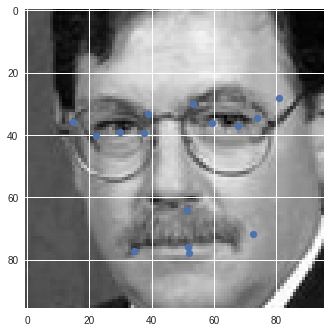

In [18]:
index = 3345
points = Y_train[index]
x = points[:,0]
y = points[:,1]
implot = plt.imshow(img[index], cmap = 'gray')
plt.scatter(x,y)
plt.show()

In [19]:
Y_train = Y_train.reshape((-1,30))
Y_val = Y_val.reshape(-1,30)
print(Y_train.shape)
print(Y_val.shape)

(4934, 30)
(2115, 30)


In [26]:
inputs = Input(shape = (96,96,1))
# conv1 = Conv2D(32,3, padding = 'same', activation = 'relu')(inputs)
# conv2 = Conv2D(32,3, padding = 'same', activation = 'relu')(conv1)
# pool2 = MaxPooling2D((2,2))(conv2)
# conv3 = Conv2D(64, 3, padding = 'same', activation = 'relu')(pool2)
# conv4 = Conv2D(64, 3, padding = 'same', activation = 'relu')(conv3)
# conv5 = Conv2D(128, 3, padding = 'same', activation = 'relu')(conv4)
# pool4 = MaxPooling2D((2,2))(conv5)
# conv6 = Conv2D(256, 3, padding = 'same', activation = 'relu')(pool4)
# conv7 = Conv2D(256, 3, padding = 'same', activation = 'relu')(conv6)
# flat = Flatten()(conv7)
# dense1 = Dense(128, activation = 'relu')(flat)
# dense2 = Dense(64, activation = 'relu')(dense1)
# dense3 = Dense(30, activation = 'relu')(dense2)

flat = Flatten()(inputs)
dense1 = Dense(1024, activation = 'relu')(flat)
# drop1 = Dropout(0.1)(dense1)
dense02 = Dense(700, activation = 'relu')(dense1)
dense2 = Dense(512, activation = 'relu')(dense02)
drop2 = Dropout(0.075)(dense2)
dense3 = Dense(128, activation = 'relu')(drop2)
dense4 = Dense(64, activation = 'relu')(dense3)
drop4 = Dropout(0.23)(dense4)
dense5 = Dense(30, activation = 'relu')(drop4)

model = Model(input = inputs, output = dense5)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              9438208   
_________________________________________________________________
dense_8 (Dense)              (None, 700)               717500    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               358912    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.7, patience = 3)


In [0]:
model.compile(Adam(lr = 10e-4), loss = 'mse', metrics = ['mae'])

In [32]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 300, batch_size = 100, callbacks = [reduce_lr])

Train on 4934 samples, validate on 2115 samples
Epoch 1/300
4934/4934 [==============================] - 2s 392us/step - loss: 42.6368 - mean_absolute_error: 4.8629 - val_loss: 9.3339 - val_mean_absolute_error: 1.8585
Epoch 2/300
4934/4934 [==============================] - 1s 246us/step - loss: 38.9087 - mean_absolute_error: 4.6301 - val_loss: 9.5465 - val_mean_absolute_error: 1.9000
Epoch 3/300
4934/4934 [==============================] - 1s 247us/step - loss: 39.2601 - mean_absolute_error: 4.6366 - val_loss: 11.9757 - val_mean_absolute_error: 2.4517
Epoch 4/300
4934/4934 [==============================] - 1s 248us/step - loss: 39.3187 - mean_absolute_error: 4.6258 - val_loss: 10.8502 - val_mean_absolute_error: 2.1825
Epoch 5/300
4934/4934 [==============================] - 1s 247us/step - loss: 37.5326 - mean_absolute_error: 4.5253 - val_loss: 9.3909 - val_mean_absolute_error: 1.9037
Epoch 6/300
4934/4934 [==============================] - 1s 248us/step - loss: 37.1043 - mean_absolu

In [0]:
timag = []
for i in range(0,1783):
    timg = data_test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [0]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1)

In [0]:
pred = model.predict(X_test)

In [50]:
print(X_test.shape)
print(pred.shape)

(1783, 96, 96, 1)
(1783, 30)


In [0]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [0]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [0]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [0]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [0]:
rowid = pd.Series(rowid,name = 'RowId')

In [0]:
loc = pd.Series(preded,name = 'Location')

In [0]:
submission = pd.concat([rowid,loc],axis = 1)

In [0]:
submission.to_csv('face_key_detection_submission.csv',index = False)